In [0]:
from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder.appName("TermDepositPrediction").enableHiveSupport().getOrCreate()

# Read the table from Hive
df = spark.table("default.bank")

# Show the first few rows of the DataFrame
df.show(5)


+---+-----------+-------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+---+
|age|        job|marital|education|default|balance|housing|loan| contact|day|month|duration|campaign|pdays|previous|poutcome|  y|
+---+-----------+-------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+---+
| 30| unemployed|married|  primary|     no|   1787|     no|  no|cellular| 19|  oct|      79|       1|   -1|       0| unknown| no|
| 33|   services|married|secondary|     no|   4789|    yes| yes|cellular| 11|  may|     220|       1|  339|       4| failure| no|
| 35| management| single| tertiary|     no|   1350|    yes|  no|cellular| 16|  apr|     185|       1|  330|       1| failure| no|
| 30| management|married| tertiary|     no|   1476|    yes| yes| unknown|  3|  jun|     199|       4|   -1|       0| unknown| no|
| 59|blue-collar|married|secondary|     no|      0|    yes|  no| unknown|  5|  may|     22

Data Understanding
- Draw a sample of the data
- Apply some in pySpark available methods to describe the data
- Convert the sample into a pandas DataFrame and run some typical data
understanding steps

In [0]:
# Draw a sample from the DataFrame
sample_df = df.sample(False, 0.1, seed=42)  # Adjust the sampling fraction as needed


In [0]:
# Descriptive statistics for numerical columns
sample_df.describe().show()

# Count distinct values for categorical columns
from pyspark.sql.functions import countDistinct

for column in ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']:
    sample_df.agg(countDistinct(column)).show()


+-------+-----------------+-------+--------+---------+-------+------------------+-------+----+--------+----------------+-----+------------------+------------------+-----------------+-------------------+--------+----+
|summary|              age|    job| marital|education|default|           balance|housing|loan| contact|             day|month|          duration|          campaign|            pdays|           previous|poutcome|   y|
+-------+-----------------+-------+--------+---------+-------+------------------+-------+----+--------+----------------+-----+------------------+------------------+-----------------+-------------------+--------+----+
|  count|              477|    477|     477|      477|    477|               477|    477| 477|     477|             477|  477|               477|               477|              477|                477|     477| 477|
|   mean|41.22851153039832|   NULL|    NULL|     NULL|   NULL|1617.9622641509434|   NULL|NULL|    NULL|16.0062893081761| NULL|256.63

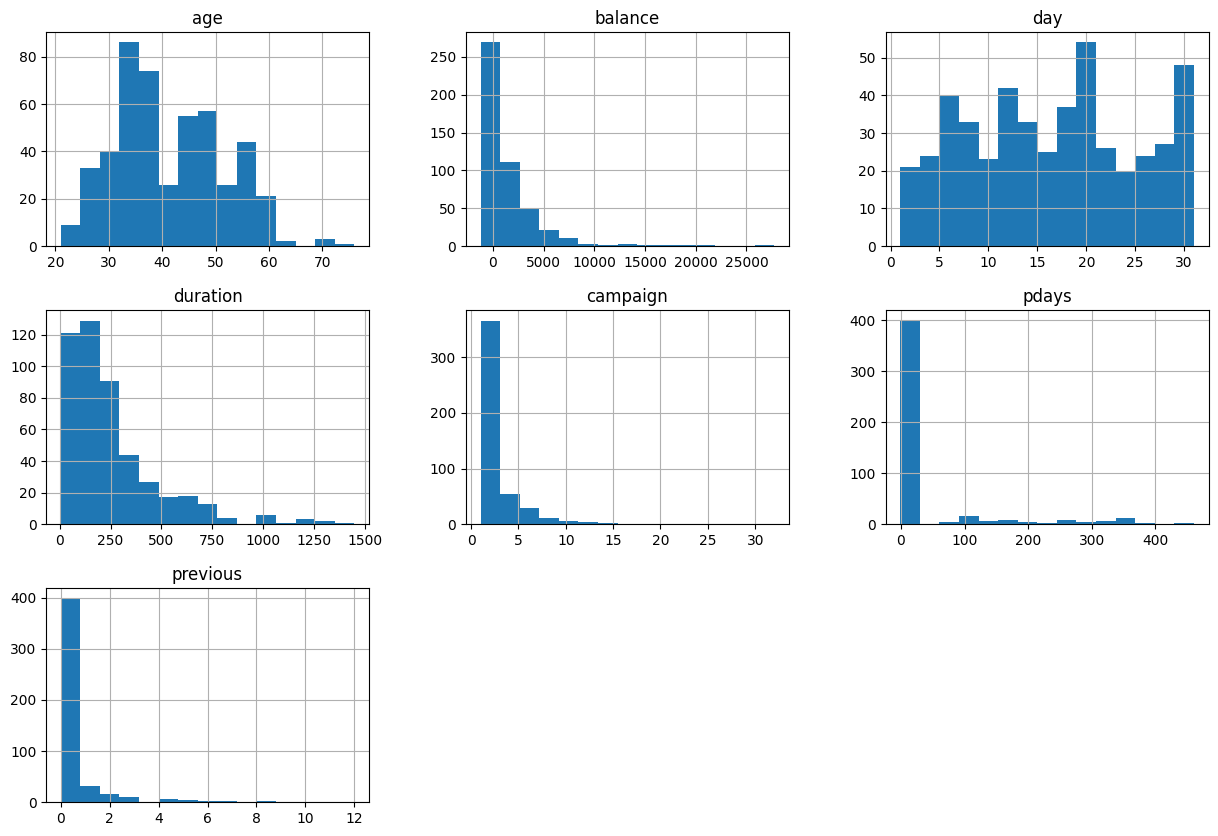

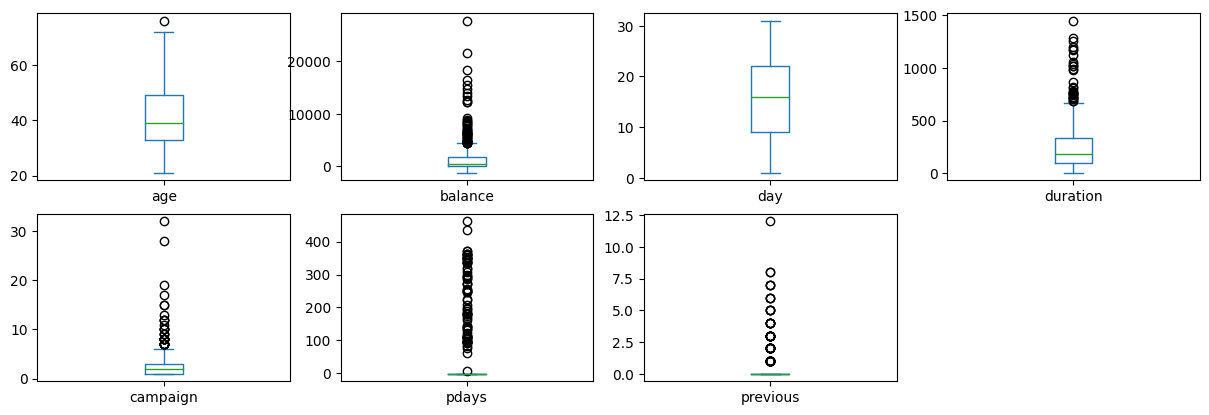

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the sampled Spark DataFrame to a Pandas DataFrame
sample_pandas_df = sample_df.toPandas()

# Histograms for numerical columns
sample_pandas_df.hist(bins=15, figsize=(15, 10))
plt.show()

# Box plots for understanding distributions
sample_pandas_df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(15,10))
plt.show()


B. Basic Descriptive Analysis in Pandas


In [0]:
# Summary statistics
print(sample_pandas_df.describe())

# Frequency counts for categorical columns
for column in ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']:
    print(sample_pandas_df[column].value_counts())


              age       balance         day  ...    campaign       pdays    previous
count  477.000000    477.000000  477.000000  ...  477.000000  477.000000  477.000000
mean    41.228512   1617.962264   16.006289  ...    2.853249   36.408805    0.440252
std     10.067012   2995.875647    8.475494  ...    3.039560   94.591351    1.320131
min     21.000000  -1224.000000    1.000000  ...    1.000000   -1.000000    0.000000
25%     33.000000     94.000000    9.000000  ...    1.000000   -1.000000    0.000000
50%     39.000000    526.000000   16.000000  ...    2.000000   -1.000000    0.000000
75%     49.000000   1818.000000   22.000000  ...    3.000000   -1.000000    0.000000
max     76.000000  27733.000000   31.000000  ...   32.000000  461.000000   12.000000

[8 rows x 7 columns]
management       116
blue-collar       91
technician        77
admin.            49
services          41
entrepreneur      22
retired           21
self-employed     20
unemployed        15
housemaid         14
stu

C. Visual Data Analysis


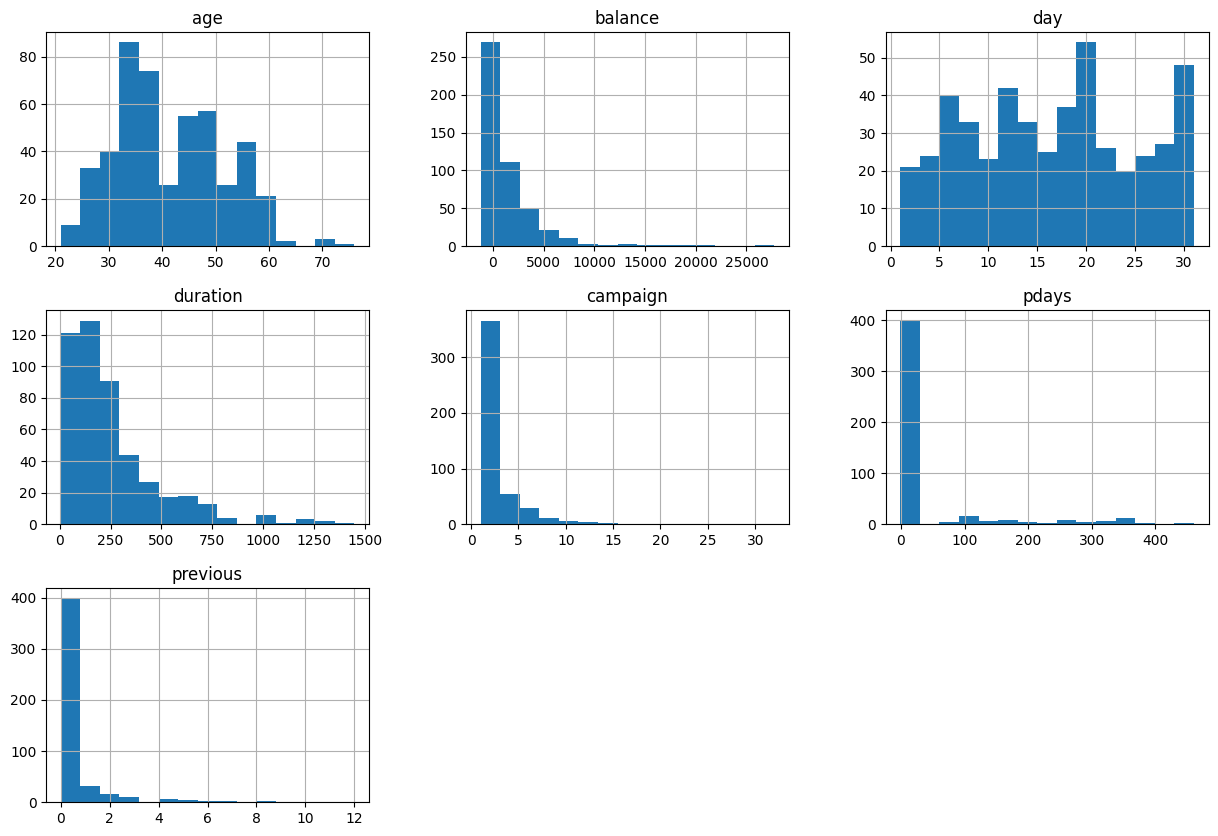

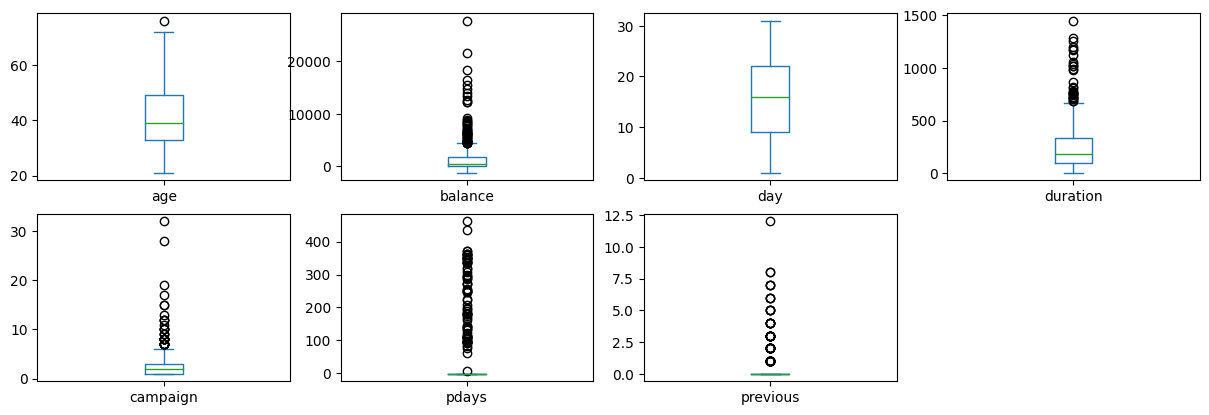

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical columns
sample_pandas_df.hist(bins=15, figsize=(15, 10))
plt.show()

# Box plots for numerical columns
sample_pandas_df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(15,10))
plt.show()


2. Data Preparation in Pandas

- A. Handling Missing Values


In [0]:
# Fill missing values or drop them based on your analysis
# Example: Fill numerical missing values with the mean
sample_pandas_df.fillna(sample_pandas_df.mean(), inplace=True)

# Example: Fill categorical missing values with the mode
for column in ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']:
    sample_pandas_df[column].fillna(sample_pandas_df[column].mode()[0], inplace=True)


/root/.ipykernel/1031/command-3148189907855851-1294103581:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sample_pandas_df.fillna(sample_pandas_df.mean(), inplace=True)


In [0]:
# Convert categorical variables to dummy variables
sample_pandas_df_encoded = pd.get_dummies(sample_pandas_df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y'])


In [0]:
from sklearn.model_selection import train_test_split

# Assuming 'y_yes' and 'y_no' are the dummy variable columns for the label 'y'
X = sample_pandas_df_encoded.drop(['y_yes', 'y_no'], axis=1)
y = sample_pandas_df_encoded['y_yes']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



Combined Modeling and Hyperparameter Tuning

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV


Model Evaluation with Best Parameters


In [0]:

# GridSearchCV for Logistic Regression
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10], 'solver': ['liblinear', 'saga']}
grid_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='roc_auc')
grid_lr.fit(X_train, y_train)

# GridSearchCV for Random Forest
param_grid_rf = {'n_estimators': [10, 50, 100], 'max_depth': [5, 10, 15]}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='roc_auc')
grid_rf.fit(X_train, y_train)

# GridSearchCV for Gradient Boosting
param_grid_gb = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
grid_gb = GridSearchCV(GradientBoostingClassifier(), param_grid_gb, cv=5, scoring='roc_auc')
grid_gb.fit(X_train, y_train)

# GridSearchCV for SVM
param_grid_svm = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']}
grid_svm = GridSearchCV(SVC(probability=True), param_grid_svm, cv=5, scoring='roc_auc')
grid_svm.fit(X_train, y_train)

# Best parameters for each model
print("Best Parameters for Logistic Regression:", grid_lr.best_params_)
print("Best Parameters for Random Forest:", grid_rf.best_params_)
print("Best Parameters for Gradient Boosting:", grid_gb.best_params_)
print("Best Parameters for SVM:", grid_svm.best_params_)


/databricks/python/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/databricks/python/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/databricks/python/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/databricks/python/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/databricks/python/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/databricks/python/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: Con

Best Parameters for Logistic Regression: {'C': 1, 'solver': 'liblinear'}
Best Parameters for Random Forest: {'max_depth': 5, 'n_estimators': 50}
Best Parameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50}
Best Parameters for SVM: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}


Model Evaluation with Best Parameters

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       133
           1       0.50      0.18      0.27        11

    accuracy                           0.92       144
   macro avg       0.72      0.58      0.61       144
weighted avg       0.90      0.92      0.91       144

Logistic Regression AUC ROC Score: 0.8270676691729324

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       133
           1       0.00      0.00      0.00        11

    accuracy                           0.92       144
   macro avg       0.46      0.50      0.48       144
weighted avg       0.85      0.92      0.89       144

Random Forest AUC ROC Score: 0.7361585782638413

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       133
           1

/databricks/python/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/databricks/python/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/databricks/python/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/databricks/python/lib/python3.10/site-p

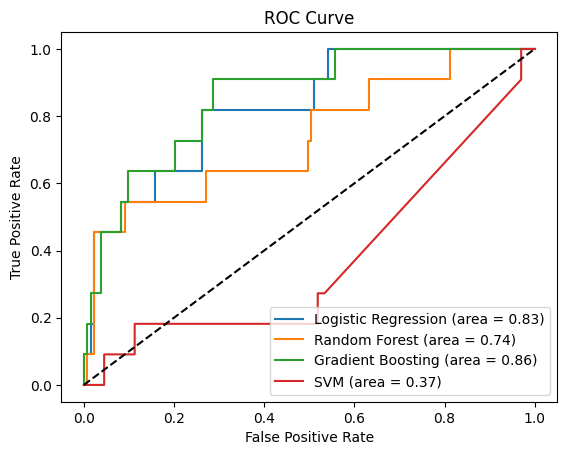

The best model is: Gradient Boosting with AUC ROC Score: 0.86


In [0]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

def evaluate_model(model, X_test, y_test, model_name):
    # Make predictions
    predictions = model.predict(X_test)
    probabilities = model.predict_proba(X_test)[:, 1]

    # Calculate AUC ROC Score
    roc_auc = roc_auc_score(y_test, probabilities)

    # Classification report
    print(f"{model_name} Classification Report:\n{classification_report(y_test, predictions)}")
    print(f"{model_name} AUC ROC Score: {roc_auc}\n")

    # Calculate ROC Curve
    fpr, tpr, _ = roc_curve(y_test, probabilities)
    plt.plot(fpr, tpr, label=f'{model_name} (area = {roc_auc:.2f})')

    return roc_auc

# Storing AUC ROC scores
auc_scores = {}
auc_scores['Logistic Regression'] = evaluate_model(lr_best, X_test, y_test, 'Logistic Regression')
auc_scores['Random Forest'] = evaluate_model(rf_best, X_test, y_test, 'Random Forest')
auc_scores['Gradient Boosting'] = evaluate_model(gb_best, X_test, y_test, 'Gradient Boosting')
auc_scores['SVM'] = evaluate_model(svm_best, X_test, y_test, 'SVM')

# Plot ROC Curves for all models
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# Identify the best model based on AUC ROC Score
best_model_name = max(auc_scores, key=auc_scores.get)
print(f"The best model is: {best_model_name} with AUC ROC Score: {auc_scores[best_model_name]:.2f}")
